## Class I Mechanism

In [64]:
import numpy as np
from src.Slm import slm
import matplotlib.pyplot as plt

# System constants
a = 0.1
Rh = a/2
Rw = (a/2)*np.sqrt(3)
Rr = 1
Rf = False
n = 30

# Forcing simulation constants
F = [0,-100 ,0,0,0,0,0,0]
E = 200e9
P = 7850   
D = 5

step_size = a/5
# System parameters for Class I
Rw_range = np.arange(0.1*a,4*a,step_size)
Rh_range = np.arange(-4*a,4*a,step_size)
Rr_range = np.arange(1,4,2*a)
Rr_range_rf = np.arange(2,4,2*a)

# Sweep function
def rhombus_sweep(Rh_range,Rw_range,a):
    SLM = slm.mechanism(Rr=1,Rf=False,A=0.1,Rh=0.05,Rw=0.05*np.sqrt(3))
    SLM = slm.mechanism(Rr=1,Rf=False,A=a,Rh=.3,Rw=0.1)
    Ky_list = np.zeros((len(Rw_range),len(Rh_range)))
    for i in range(len(Rw_range)):
        for j in range(len(Rh_range)):
            Rw = Rw_range[i]
            Rh = Rh_range[j]
            if not (Rh <0.1*a and Rh > -0.1*a) and not (Rh <-.9*a and Rh > -1.1*a):
                SLM.update_links(Rr,Rf,A=a,Rh=Rh,Rw=Rw)
                _,k_min,_,_ = SLM.find_system_properties(F,E,D,P)
                Ky_list[i,j] = k_min
    return Ky_list
    
Ky = rhombus_sweep(Rh_range,Rw_range,a)

c:\Users\Kuba\plane-mechanism\src\Slm\slm.py:73: RuntimeWarning: invalid value encountered in arccos
  T = np.arccos((L2**2+L3**2-L1**2)/(2*L2*L3))
c:\Users\Kuba\plane-mechanism\src\Slm\slm.py:73: RuntimeWarning: invalid value encountered in double_scalars
  T = np.arccos((L2**2+L3**2-L1**2)/(2*L2*L3))


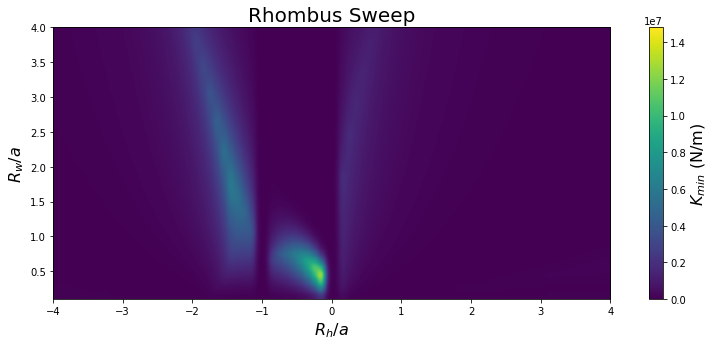

In [67]:
plt.imshow(Ky,interpolation="gaussian",origin="lower",extent=(-4,4,0.1,4))
cb = plt.colorbar()
cb.set_label("$K_{min}$ (N/m)",fontsize=16)
cb.formatter.set_powerlimits((0, 0))
plt.xlabel("$R_h/a}$",fontsize=16)
plt.ylabel("$R_w/a$",fontsize=16)
plt.title("Rhombus Sweep",fontsize = 20)
fig = plt.gcf()
fig.set_size_inches((14,5)  )
plt.show()